“In this section, we load the data, validate data quality (missing values, duplicates, types), convert dates, remove non-informative identifiers, and prepare time-ordered datasets for EDA and modeling.”

In [1]:
import optuna
import optuna.visualization as vis
import time

import scipy.stats as st

from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error, make_scorer

from sklearn.model_selection import cross_val_score

/opt/anaconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [3]:
day_df = pd.read_csv("../data/raw/day.csv")

In [4]:
print(day_df.shape)

(731, 16)


In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Initial Cleaning

In [7]:
#Convert object type to datetime for date column
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [8]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [9]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
#Drop instant (ID column)
day_df.drop(columns=["instant"], inplace=True)

In [11]:
#Missing values?
print(day_df.isna().sum())


dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
#duplicates?
print(day_df.duplicated().sum())


0


In [13]:
# Sort by time
day_df = day_df.sort_values("dteday").reset_index(drop=True)


In [14]:
#Leakage columns dropping
day_df.drop(columns=["casual", "registered"], inplace=True)

In [15]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [16]:
day_df['weathersit'].value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

In [17]:
day_df['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [18]:
day_clean = day_df.copy()

In [19]:
#choosing the columns that we would like to analyze

In [20]:
#Target column
target_col = "cnt"

## EDA

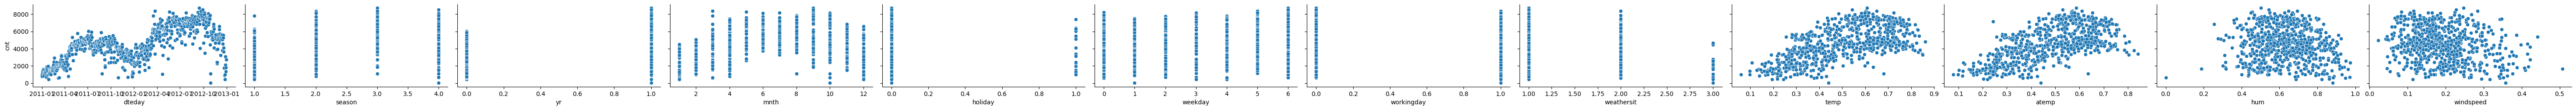

In [21]:
#Loading and preparing the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(day_clean, y_vars=['cnt'], x_vars=day_clean.columns[:-1], kind='scatter', aspect= 2)

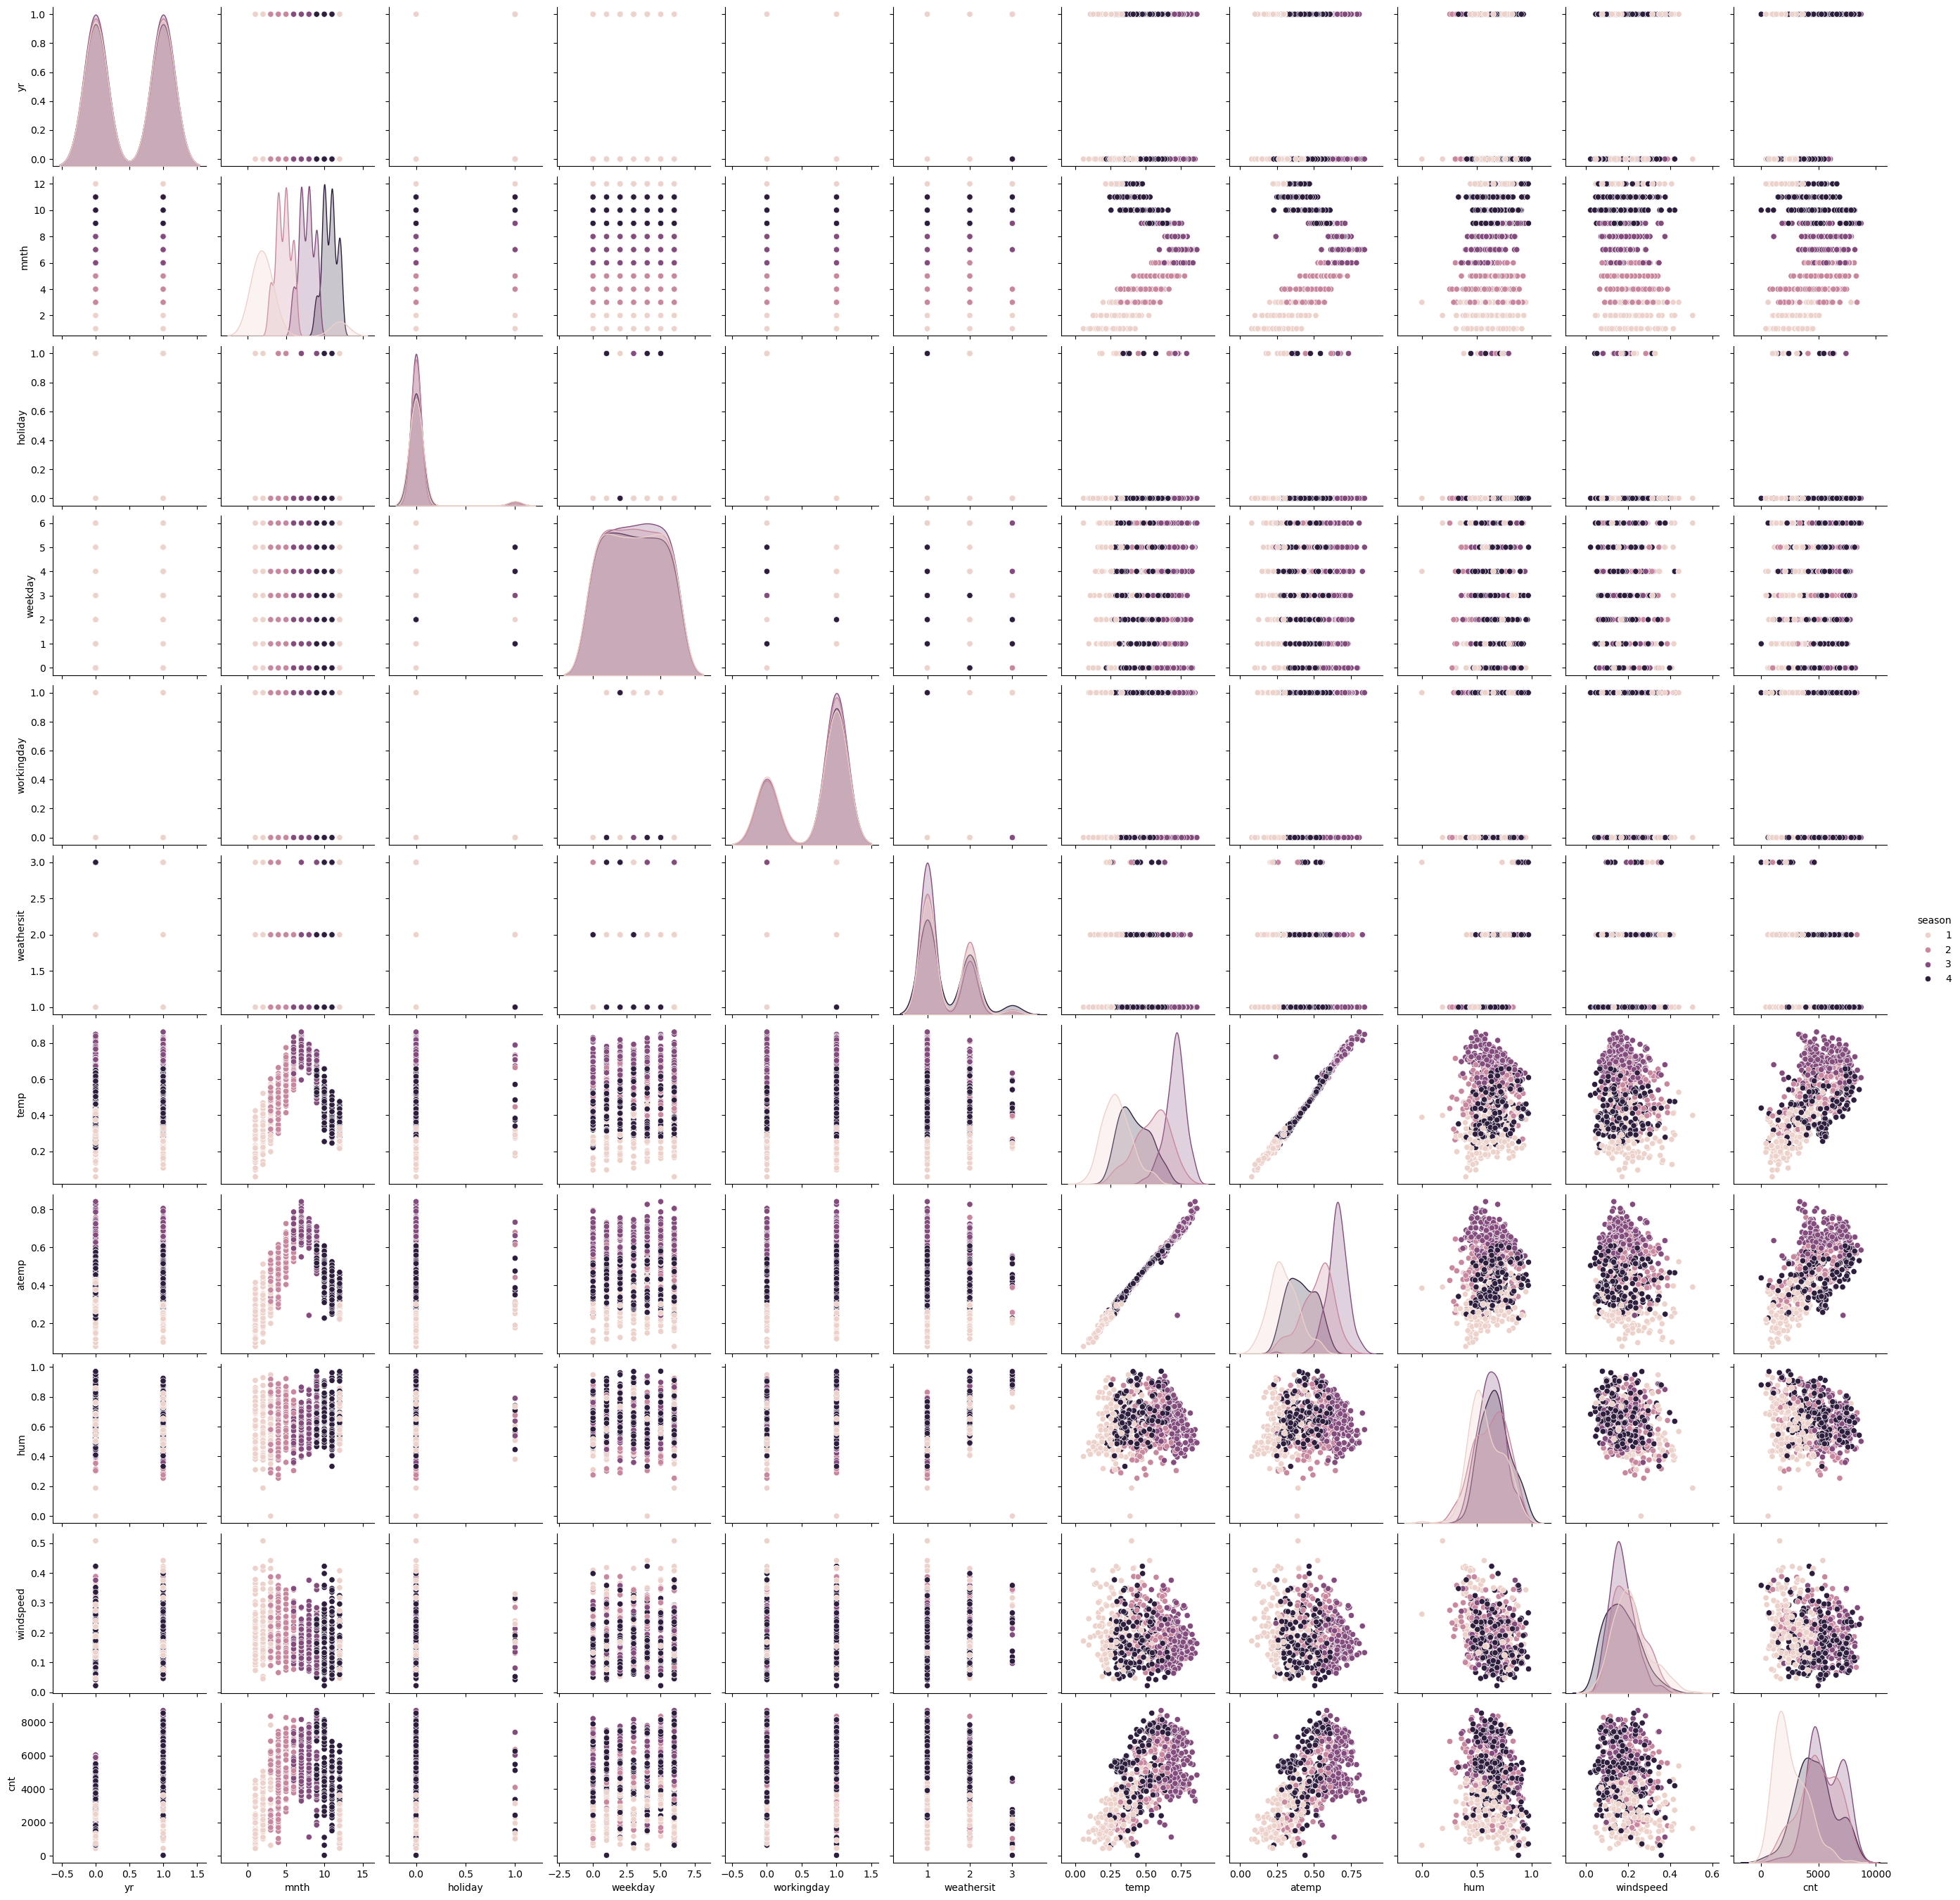

In [22]:
#sns.pairplot(day_clean, hue="season")
#plt.show()

In [56]:
X = day_clean.drop(columns=["cnt", "dteday", "atemp"])
y = day_clean["cnt"]

In [57]:
day_clean["yr"].value_counts().sort_index()

yr
0    365
1    366
Name: count, dtype: int64

In [58]:
features

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.652917,0.350133
727,1,1,12,0,5,1,2,0.253333,0.590000,0.155471
728,1,1,12,0,6,0,2,0.253333,0.752917,0.124383
729,1,1,12,0,0,0,1,0.255833,0.483333,0.350754


## Train Test Split

In [59]:
df_categorical_feat = day_clean[["season", "mnth", "weekday", "weathersit"]] # OHE
df_numerical_feat = day_clean[["temp", "hum", "windspeed"]] # Scale

In [60]:
df_categorical_feat

,season,mnth,weekday,weathersit
0,1,1,6,2
1,1,1,0,2
2,1,1,1,1
3,1,1,2,1
4,1,1,3,1
...,...,...,...,...
726,1,12,4,2
727,1,12,5,2
728,1,12,6,2
729,1,12,0,1


## OneHotEncoder

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [62]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='first') # To avoid having an sparse_matrix as output


In [63]:
df_categorical_feat.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [64]:
ohe.fit(X_train[["season", "mnth", "weekday", "weathersit"]]) # The .fit() method determines the unique values of each column
X_train_trans_np = ohe.transform(X_train[["season", "mnth", "weekday", "weathersit"]])
X_train_trans_np

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]], shape=(584, 22))

In [65]:
X_train_trans_df = pd.DataFrame(X_train_trans_np, columns=ohe.get_feature_names_out(), index=X_train.index)
#X_train_trans_df

In [66]:
X_test_trans_np = ohe.transform(X_test[["season", "mnth", "weekday", "weathersit"]])
X_test_trans_np

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(147, 22))

In [67]:
X_test_trans_df = pd.DataFrame(X_test_trans_np, columns=ohe.get_feature_names_out(), index=X_test.index)
X_test_trans_df

,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
196,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
187,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
688,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
266,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
504,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Scaler

In [68]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled_np = scaler.transform(X_train)
X_test_scaled_np  = scaler.transform(X_test)

X_train_standarized = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
X_test_standarized  = pd.DataFrame(X_test_scaled_np, columns=X_test.columns, index=X_test.index)


In [69]:
normalizer = MinMaxScaler()

normalizer.fit(X_train)

X_train_norm_np = normalizer.transform(X_train)
X_test_norm_np  = normalizer.transform(X_test)

X_train_norm_df = pd.DataFrame(X_train_norm_np, columns=X_train.columns, index=X_train.index)
X_test_norm_df  = pd.DataFrame(X_test_norm_np, columns=X_test.columns, index=X_test.index)


In [70]:
X_train_norm_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
97,0.333333,0.0,0.272727,0.0,0.833333,1.0,0.5,0.350240,0.804426,0.486058
503,0.333333,1.0,0.363636,0.0,0.833333,1.0,0.0,0.639257,0.355263,0.248737
642,1.000000,1.0,0.818182,0.0,0.666667,1.0,0.5,0.757395,0.641747,0.198020
498,0.333333,1.0,0.363636,0.0,0.000000,0.0,0.0,0.700435,0.431220,0.481123
303,1.000000,0.0,0.818182,0.0,0.166667,1.0,0.0,0.355515,0.613636,0.168555
...,...,...,...,...,...,...,...,...,...,...
707,1.000000,1.0,1.000000,0.0,1.000000,0.0,0.5,0.408255,0.912081,0.155472
192,0.666667,0.0,0.545455,0.0,0.333333,1.0,0.0,0.930383,0.406699,0.415689
629,0.666667,1.0,0.727273,0.0,0.833333,1.0,0.0,0.683559,0.563995,0.294562
559,0.666667,1.0,0.545455,0.0,0.833333,1.0,0.5,0.851273,0.301435,0.101444


In [71]:
X_train_standarized

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
97,-0.460221,-0.993174,-0.735862,-0.167836,1.005404,0.667491,1.141100,-0.845148,1.517365,0.490775
503,-0.460221,1.006873,-0.446667,-0.167836,1.005404,0.667491,-0.720359,0.394863,-0.716387,-0.689399
642,1.343598,1.006873,0.999306,-0.167836,0.502271,0.667491,1.141100,0.901725,0.708339,-0.941611
498,-0.460221,1.006873,-0.446667,-0.167836,-1.510260,-1.498147,-0.720359,0.657344,-0.338640,0.466236
303,1.343598,-0.993174,0.999306,-0.167836,-1.007127,0.667491,-0.720359,-0.822519,0.568539,-1.088139
...,...,...,...,...,...,...,...,...,...,...
707,1.343598,1.006873,1.577696,-0.167836,1.508537,-1.498147,1.141100,-0.596238,2.052751,-1.153198
192,0.441688,-0.993174,0.131722,-0.167836,-0.503995,0.667491,-0.720359,1.643922,-0.460587,0.140839
629,0.441688,1.006873,0.710112,-0.167836,1.005404,0.667491,-0.720359,0.584937,0.321669,-0.461518
559,0.441688,1.006873,0.131722,-0.167836,1.005404,0.667491,1.141100,1.304503,-0.984080,-1.421873


# Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_standarized, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_norm_df, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [81]:
y_pred_test2 = lin_reg2.predict(X_test_norm_df)

print(f"MAE {mean_absolute_error(y_pred_test2, y_test): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"MSE {mean_squared_error(y_pred_test2, y_test): .2f}") # mean(error**2) = mean((y_test - y_pred_test)**2)
print(f"RMSE, {root_mean_squared_error(y_pred_test2, y_test): .2f}") # sqrt( mean( (y_test - y_pred_test)**2 ) ) # b0, b1, b2...
print(f"R2 score, {lin_reg2.score(X_test_norm_df, y_test): .2f}") # r2_score

MAE  1508.64
MSE  3514452.86
RMSE,  1874.69
R2 score,  0.17


In [82]:
y_pred_test = lin_reg.predict(X_test_standarized)

print(f"MAE {mean_absolute_error(y_pred_test, y_test): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"MSE {mean_squared_error(y_pred_test, y_test): .2f}") # mean(error**2) = mean((y_test - y_pred_test)**2)
print(f"RMSE, {root_mean_squared_error(y_pred_test, y_test): .2f}") # sqrt( mean( (y_test - y_pred_test)**2 ) ) # b0, b1, b2...
print(f"R2 score, {lin_reg.score(X_test_standarized, y_test): .2f}") # r2_score

MAE  694.18
MSE  840058.08
RMSE,  916.55
R2 score,  0.80


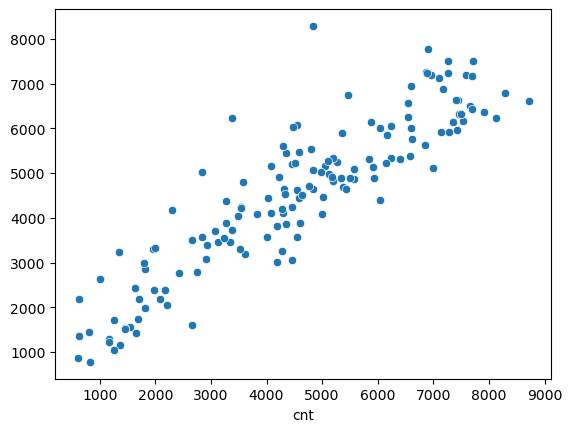

In [84]:
sns.scatterplot(x=y_test, y=y_pred_test); # y_pred_test = y_test;  y_pred_test = 0 + y_test; y_pred_test = 0 + 1 * y_test

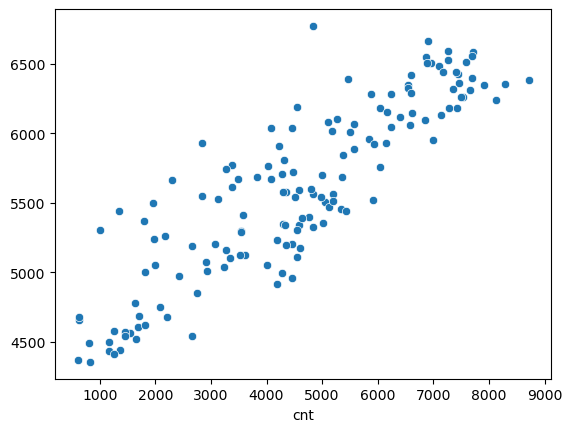

In [85]:
sns.scatterplot(x=y_test, y=y_pred_test2); # y_pred_test = y_test;  y_pred_test = 0 + y_test; y_pred_test = 0 + 1 * y_test

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score

In [87]:
log_reg = LogisticRegression()

In [89]:
log_reg.fit(X_train_standarized, y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [90]:
y_pred_test_log = log_reg.predict(X_test_standarized)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

          22       0.00      0.00      0.00       0.0
         431       0.00      0.00      0.00       0.0
         441       0.00      0.00      0.00       0.0
         605       0.00      0.00      0.00       1.0
         623       0.00      0.00      0.00       1.0
         627       0.00      0.00      0.00       1.0
         683       0.00      0.00      0.00       0.0
         801       0.00      0.00      0.00       1.0
         822       0.00      0.00      0.00       1.0
         920       0.00      0.00      0.00       0.0
         959       0.00      0.00      0.00       0.0
         986       0.00      0.00      0.00       0.0
        1013       0.00      0.00      0.00       1.0
        1162       0.00      0.00      0.00       1.0
        1167       0.00      0.00      0.00       1.0
        1248       0.00      0.00      0.00       1.0
        1263       0.00      0.00      0.00       1.0
        1301       0.00    

/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/multiclass.py:79: UserWarning: The number of unique clas

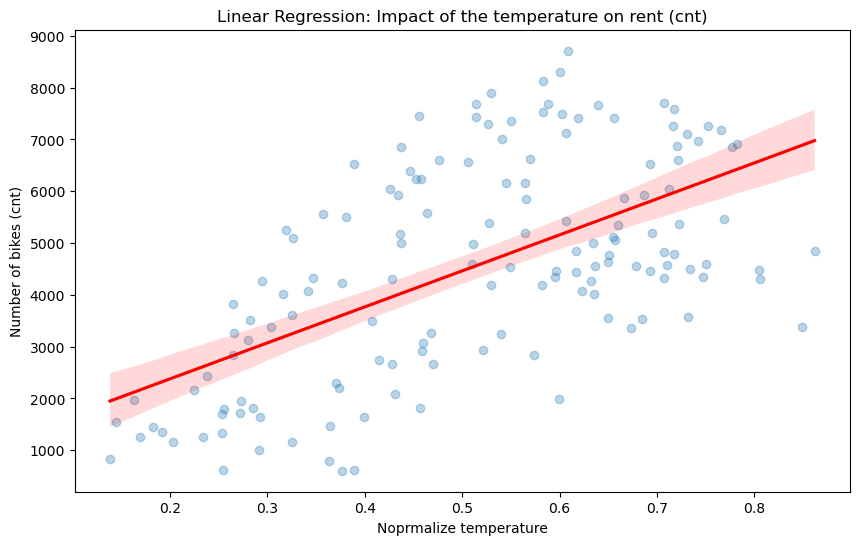

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de la relation Linéaire
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test['temp'], y=y_test, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Linear Regression: Impact of the temperature on rent (cnt)")
plt.xlabel("Noprmalize temperature")
plt.ylabel("Number of bikes (cnt)")
plt.show()

# DecisionTreeRegressor

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [99]:
tree = DecisionTreeRegressor(max_depth=2)

In [100]:
tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [101]:
y_pred_test = tree.predict(X_test)

print(f"MAE {mean_absolute_error(y_pred_test, y_test): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"MSE {mean_squared_error(y_pred_test, y_test): .2f}") # mean(error**2) = mean((y_test - y_pred_test)**2)
print(f"RMSE, {root_mean_squared_error(y_pred_test, y_test): .2f}") # sqrt( mean( (y_test - y_pred_test)**2 ) ) # b0, b1, b2...
print(f"R2 score, {tree.score(X_test, y_test): .2f}") # r2_score

MAE  956.89
MSE  1503614.55
RMSE,  1226.22
R2 score,  0.65


In [104]:
tree_importance = {feature : importance for feature, importance in zip(X_train_standarized.columns, tree.feature_importances_)}
tree_importance

{'season': np.float64(0.0),
 'yr': np.float64(0.4251245105989321),
 'mnth': np.float64(0.0),
 'holiday': np.float64(0.0),
 'weekday': np.float64(0.0),
 'workingday': np.float64(0.0),
 'weathersit': np.float64(0.0),
 'temp': np.float64(0.574875489401068),
 'hum': np.float64(0.0),
 'windspeed': np.float64(0.0)}

In [105]:
from sklearn.tree import export_text

tree_viz = export_text(tree, feature_names=list(X_train_standarized.columns))
print(tree_viz)

|--- temp <= 0.46
|   |--- yr <= 0.50
|   |   |--- value: [2424.88]
|   |--- yr >  0.50
|   |   |--- value: [4151.02]
|--- temp >  0.46
|   |--- yr <= 0.50
|   |   |--- value: [4407.89]
|   |--- yr >  0.50
|   |   |--- value: [6697.35]



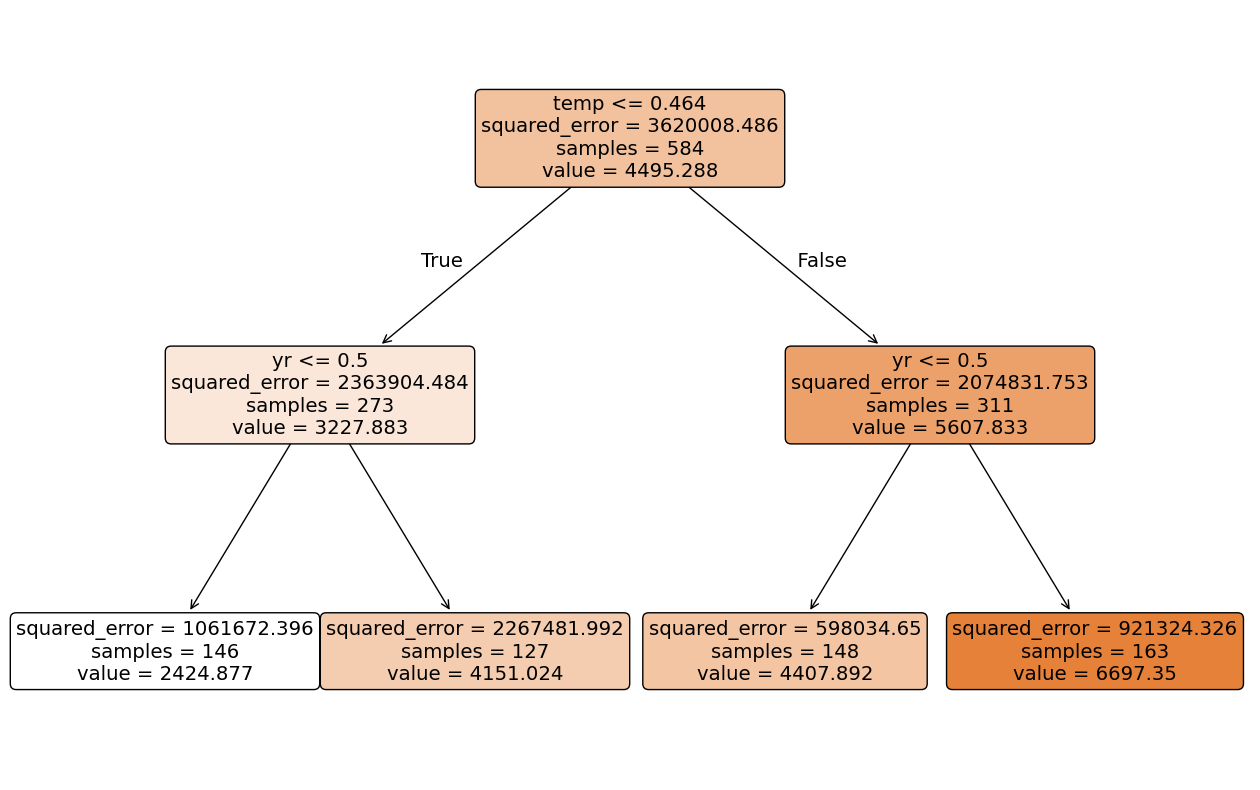

In [106]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plot_tree(tree, feature_names=X_train_standarized.columns, filled=True, rounded=True)
plt.show()

# Random forest

In [107]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

In [108]:
forest = RandomForestRegressor(n_estimators=100,max_depth=20)

In [109]:
forest.fit(X_train_standarized, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [110]:
y_pred_test_rf = forest.predict(X_test_standarized)

print(f"MAE, {mean_absolute_error(y_pred_test_rf, y_test): .2f}")
print(f"MSE, {mean_squared_error(y_pred_test_rf, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test_rf, y_test): .2f}")
print(f"R2 score, {forest.score(X_test_standarized, y_test): .2f}")

MAE,  470.38
MSE,  419076.34
RMSE,  647.36
R2 score,  0.90


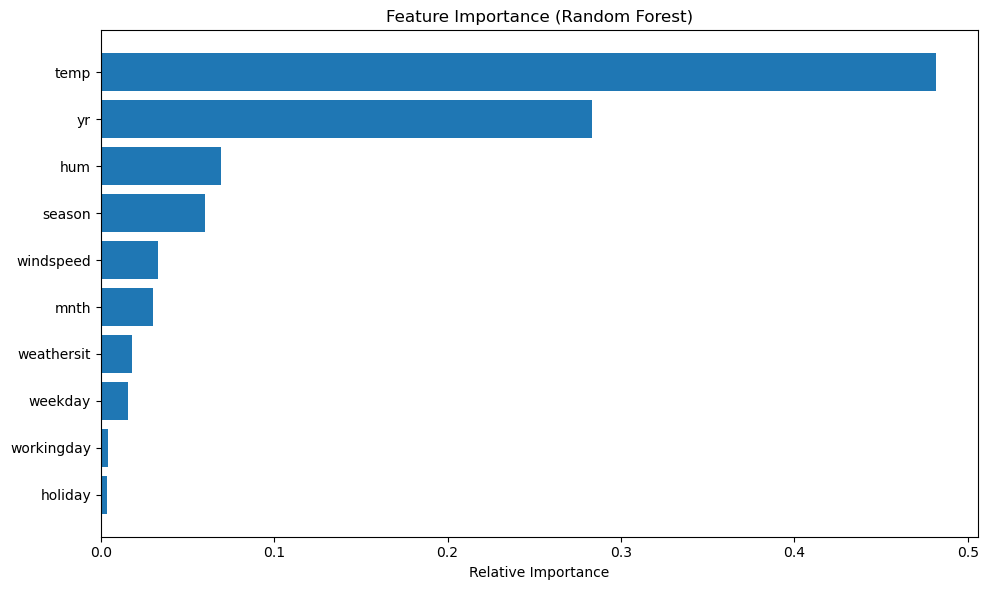

In [126]:
import numpy as np
import matplotlib.pyplot as plt

# Feature importances from Random Forest
importances = forest.feature_importances_

# Sort features by importance
indices = np.argsort(importances)

# Plot
plt.figure(figsize=(10, 6))
plt.title('Feature Importance (Random Forest)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()


# Gradient Boosting

In [113]:
gb_reg = GradientBoostingRegressor(max_depth=20,n_estimators=100)

In [114]:
gb_reg.fit(X_train_standarized, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,20
,min_impurity_decrease,0.0
,init,None


In [115]:
y_pred_test_gb = gb_reg.predict(X_test_standarized)

print(f"MAE, {mean_absolute_error(y_pred_test_gb, y_test): .2f}")
print(f"MSE, {mean_squared_error(y_pred_test_gb, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test_gb, y_test): .2f}")
print(f"R2 score, {gb_reg.score(X_test_standarized, y_test): .2f}")

MAE,  645.03
MSE,  759444.25
RMSE,  871.46
R2 score,  0.82


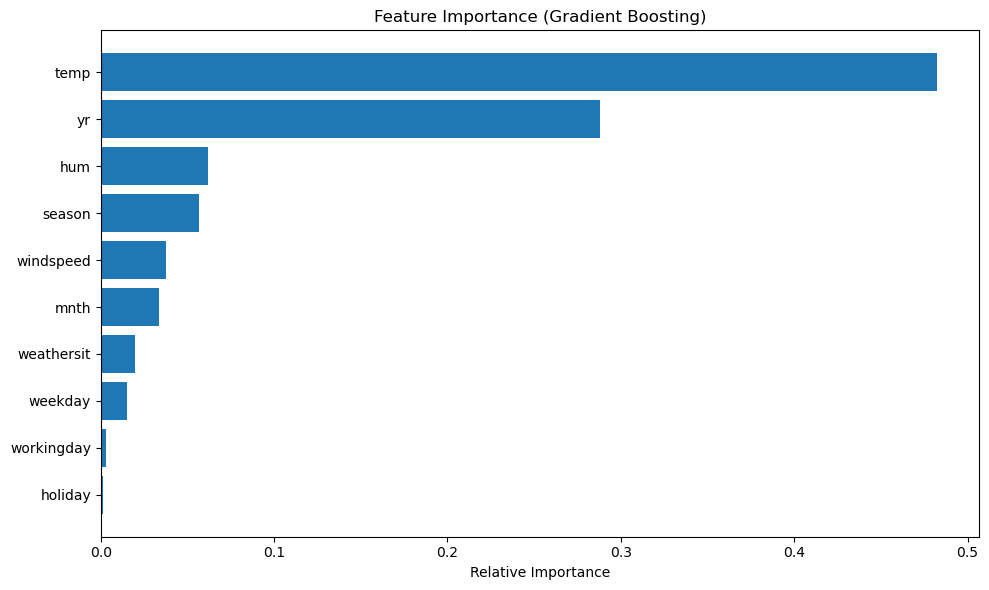

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Feature importances from the trained Gradient Boosting model
importances = gb_reg.feature_importances_

# Sort features by importance
indices = np.argsort(importances)

# Plot
plt.figure(figsize=(10, 6))
plt.title('Feature Importance (Gradient Boosting)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()


# Grid Search

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
import optuna
import optuna.visualization as vis
import time

In [118]:
# First we need to setup a dictionary with all the values that we want to try for each hyprerparameter

parameter_grid = {"max_depth": [10, 50],
                  "min_samples_split": [4, 16],
                  "max_leaf_nodes": [250, 100],
                  "max_features": ["sqrt", "log2"]} # In example we're going to test 2 * 2 * 2 * 2 = 16 combinations of hyperparameters

# We create an instance or our machine learning model
dt = DecisionTreeRegressor(random_state=123)

# We need to set this two variables to be able to compute a confidence interval
confidence_level = 0.95
folds = 10

# Now we need to create an intance of the GridSearchCV class
#The option 'scoring', alonside with new_metric ='make_scorer' allows you to evaluate the model performance
gs = GridSearchCV(dt, param_grid=parameter_grid, cv=folds, verbose=10) # Here the "cv" allows you to define the number of folds to use.

start_time = time.time()
gs.fit(X_train_norm_df, y_train)
end_time = time.time()

print("\n")
print(f"Time taken to find the best combination of hyperparameters among the given ones: {end_time - start_time: .4f} seconds")
print("\n")


print(f"The best combination of hyperparameters has been: {gs.best_params_}")
print(f"The R2 is: {gs.best_score_: .4f}")

results_gs_df = pd.DataFrame(gs.cv_results_).sort_values(by="mean_test_score", ascending=False)

#print(results_df.head())
gs_mean_score = results_gs_df.iloc[0,-3]
gs_sem = results_gs_df.iloc[0,-2] / np.sqrt(10)

gs_tc = st.t.ppf(1-((1-confidence_level)/2), df=folds-1)
gs_lower_bound = gs_mean_score - ( gs_tc * gs_sem )
gs_upper_bound = gs_mean_score + ( gs_tc * gs_sem )

print(f"The R2 confidence interval for the best combination of hyperparameters is: \
    ({gs_lower_bound: .4f}, {gs_mean_score: .4f}, {gs_upper_bound: .4f}) ")

#display(results_df)

# Let's store the best model
best_model = gs.best_estimator_

# Now is time evaluate the model in the test set
y_pred_test_df = best_model.predict(X_test_norm_df)
y_pred_test_df = best_model.predict(X_test_norm_df)

y_pred_test_df = best_model.predict(X_test_norm_df)

print("\n")
print(f"Test MAE: {mean_absolute_error(y_pred_test_df, y_test): .4f}")
print(f"Test MSE: {mean_squared_error(y_pred_test_df, y_test): .4f}")
print(f"Test RMSE: {root_mean_squared_error(y_pred_test_df, y_test): .4f}")
print(f"Test R2 score:  {best_model.score(X_test_norm_df, y_test): .4f}")
print("\n")

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10; 1/16] START max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4
[CV 1/10; 1/16] END max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4;, score=0.646 total time=   0.0s
[CV 2/10; 1/16] START max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4
[CV 2/10; 1/16] END max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4;, score=0.595 total time=   0.0s
[CV 3/10; 1/16] START max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4
[CV 3/10; 1/16] END max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4;, score=0.636 total time=   0.1s
[CV 4/10; 1/16] START max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4
[CV 4/10; 1/16] END max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4;, score=0.466 total time=   0.0s
[CV 5/10; 1/16] START max_depth=10, max_features=sqrt

In [ ]:
import seaborn as sns

In [ ]:
Plot optimization history
vis.plot_optimization_history(study)

In [ ]:
Plot parameter importance
vis.plot_param_importances(study)

In [120]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=results['rank_test_score'],
    y=results['mean_test_score']
)
plt.title('Ranking of Hyperparameter Combinations')
plt.show()

NameError: name 'results' is not defined

<Figure size 800x500 with 0 Axes>